

**This is a basic data exploration notebook which I have created for getting insights from the mercedes-benz data**
------------------------------------------------------------------------



In [1]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import math

from sklearn.preprocessing import LabelEncoder
import xgboost as xgb

#Disable pandas warnings
pd.options.mode.chained_assignment = None

import warnings
warnings.filterwarnings('ignore')

In [2]:
train=pd.read_csv("../input/train.csv")
test=pd.read_csv("../input/test.csv")

In [3]:
train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


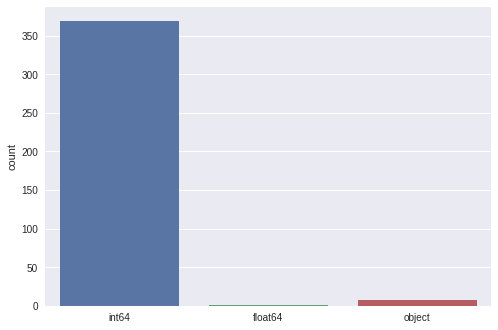

In [4]:
sns.countplot(train.dtypes)

In [5]:
train.describe()

,ID,y,X10,X11,X12,X13,X14,X15,X16,X17,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.0,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,4205.960798,100.669318,0.013305,0.0,0.075077,0.057971,0.428130,0.000475,0.002613,0.007603,...,0.318841,0.057258,0.314802,0.020670,0.009503,0.008078,0.007603,0.001663,0.000475,0.001426
std,2437.608688,12.679381,0.114590,0.0,0.263547,0.233716,0.494867,0.021796,0.051061,0.086872,...,0.466082,0.232363,0.464492,0.142294,0.097033,0.089524,0.086872,0.040752,0.021796,0.037734
min,0.000000,72.110000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2095.000000,90.820000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4220.000000,99.150000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6314.000000,109.010000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8417.000000,265.320000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
sum(train.isnull().sum()), sum(test.isnull().sum())

(0, 0)

In [7]:
train.shape, test.shape

((4209, 378), (4209, 377))

## Feature Importances
Lets train a basic xgboost to check feature importances

In [8]:
for col in train.select_dtypes(['object']).columns:
    lb=LabelEncoder()
    lb.fit(train[col])
    train[col]=lb.transform(train[col])
    
x_train=train.drop(['y','ID'],1)
y_train=train['y']

xgb_params = {
    'eta': 0.05,
    'max_depth': 8,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1
}
dtrain = xgb.DMatrix(x_train, y_train, feature_names=x_train.columns.values)
model = xgb.train(dict(xgb_params, silent=1), dtrain, num_boost_round=100)

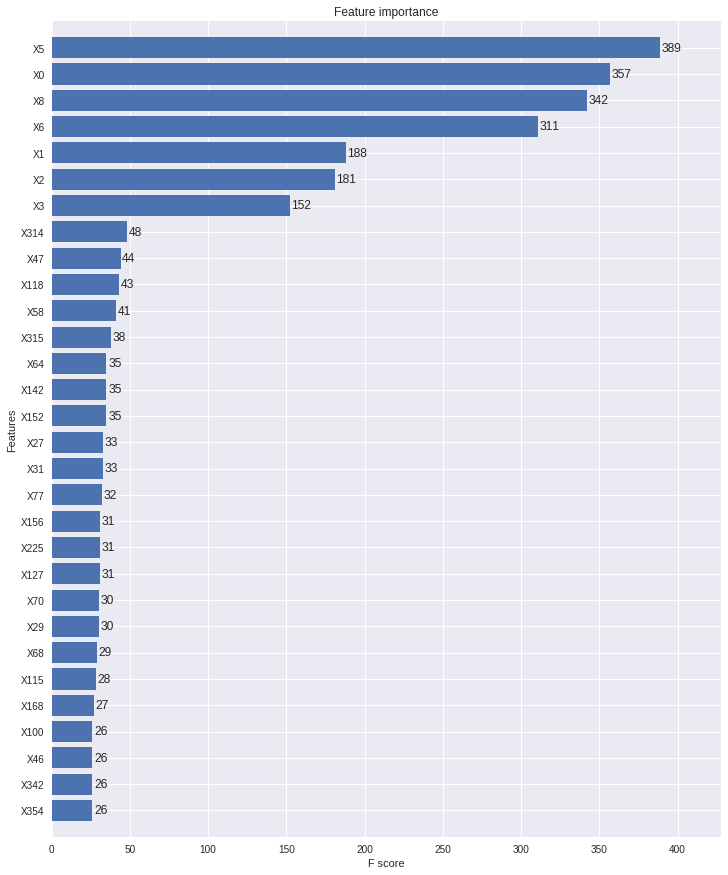

In [9]:
fig, ax = plt.subplots(figsize=(12,15))
xgb.plot_importance(model, height=0.8, ax=ax, max_num_features=30)
plt.show()

Top 8 features are: X8, X5, X0, X6, X1, X3, X2. Categorical variables are the most important. Next are the binary variables.
Now We check the correlation between these features.

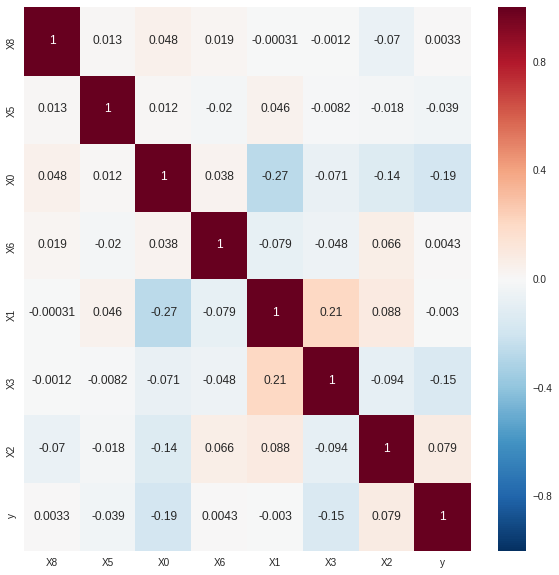

In [10]:
plt.figure(figsize=(10,10))
top_features=['X8','X5','X0','X6','X1','X3','X2','y']
train_top_features_df=train[top_features]
test_top_features_df=test[top_features[0:len(top_features)-1]]
sns.heatmap(train_top_features_df.corr(), annot=True)

Top 8 features are: X8, X5, X0, X6, X1, X3, X2. Categorical variables are the most important followed the binary variables.
Now We check the correlation between these features.

## X5, X0, X6, X1, X2, X3, X8

In [11]:
train_top_features_df.X5.describe()

count    4209.000000
mean       13.340223
std         8.250832
min         0.000000
25%         5.000000
50%        15.000000
75%        21.000000
max        28.000000
Name: X5, dtype: float64

In [12]:
train_top_features_df.X5.value_counts()

25    231
26    231
21    220
22    215
9     214
23    214
18    212
17    208
20    208
13    207
4     205
6     204
2     200
1     197
16    195
5     188
3     185
15    177
8     131
14    125
0     112
7      97
19     20
10      7
27      2
28      1
24      1
12      1
11      1
Name: X5, dtype: int64

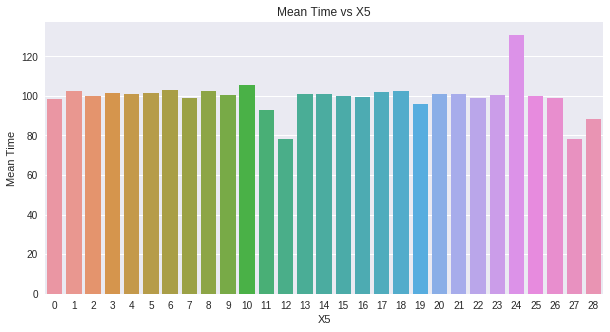

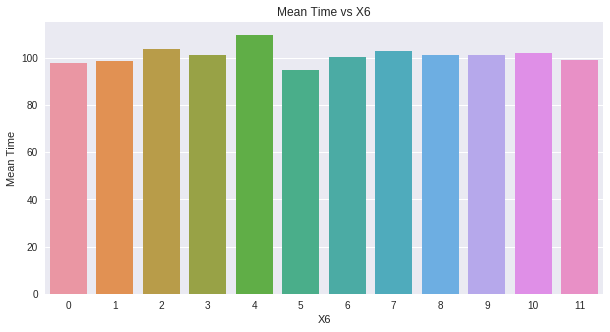

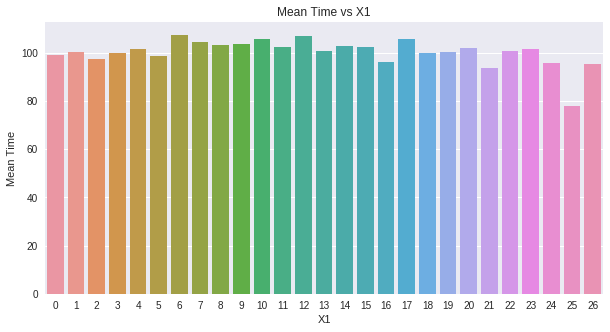

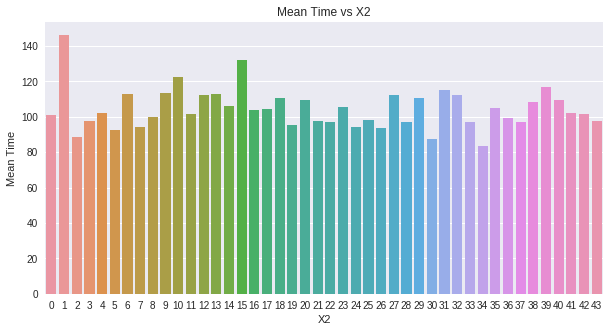

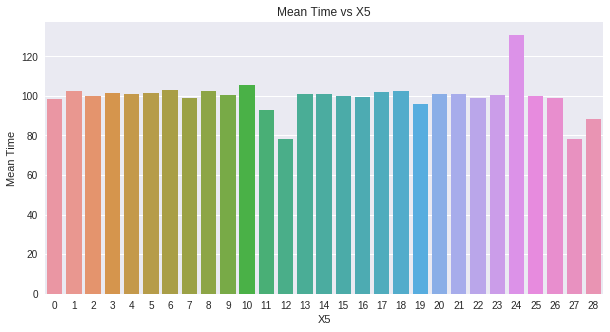

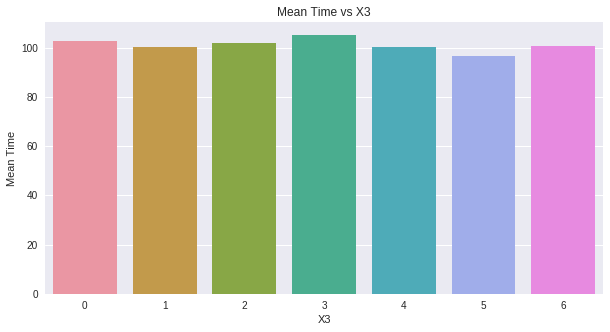

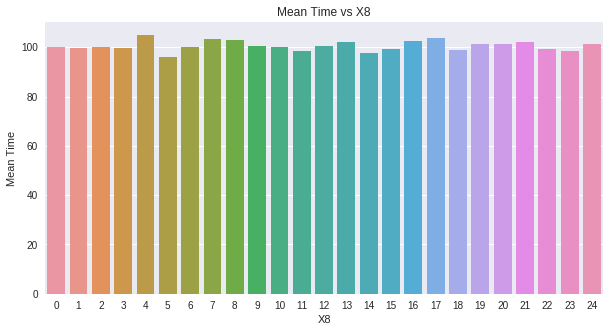

In [13]:

x5_df=train_top_features_df.groupby(by='X5')['y'].aggregate(np.mean).reset_index()
x5_df=x5_df.sort_values(by='X5')
plt.figure(1,figsize=(10,5))
ind=np.arange(x5_df.shape[0])
sns.barplot(x5_df.X5.values, x5_df.y.values)
plt.xlabel("X5")
plt.ylabel("Mean Time")
plt.title("Mean Time vs X5")



x6_df=train_top_features_df.groupby(by='X6')['y'].aggregate(np.mean).reset_index()
x6_df=x6_df.sort_values(by='X6')
plt.figure(2,figsize=(10,5))
ind=np.arange(x6_df.shape[0])
sns.barplot(x6_df.X6.values, x6_df.y.values)
plt.xlabel("X6")
plt.ylabel("Mean Time")
plt.title("Mean Time vs X6")



x1_df=train_top_features_df.groupby(by='X1')['y'].aggregate(np.mean).reset_index()
x1_df=x1_df.sort_values(by='X1')
plt.figure(3,figsize=(10,5))
ind=np.arange(x1_df.shape[0])
sns.barplot(x1_df.X1.values, x1_df.y.values)
plt.xlabel("X1")
plt.ylabel("Mean Time")
plt.title("Mean Time vs X1")


x2_df=train_top_features_df.groupby(by='X2')['y'].aggregate(np.mean).reset_index()
x2_df=x2_df.sort_values(by='X2')
plt.figure(4,figsize=(10,5))
ind=np.arange(x2_df.shape[0])
sns.barplot(x2_df.X2.values, x2_df.y.values)
plt.xlabel("X2")
plt.ylabel("Mean Time")
plt.title("Mean Time vs X2")


x5_df=train_top_features_df.groupby(by='X5')['y'].aggregate(np.mean).reset_index()
x5_df=x5_df.sort_values(by='X5')
plt.figure(5,figsize=(10,5))
ind=np.arange(x5_df.shape[0])
sns.barplot(x5_df.X5.values, x5_df.y.values)
plt.xlabel("X5")
plt.ylabel("Mean Time")
plt.title("Mean Time vs X5")



x3_df=train_top_features_df.groupby(by='X3')['y'].aggregate(np.mean).reset_index()
x3_df=x3_df.sort_values(by='X3')
plt.figure(6,figsize=(10,5))
ind=np.arange(x3_df.shape[0])
sns.barplot(x3_df.X3.values, x3_df.y.values)
plt.xlabel("X3")
plt.ylabel("Mean Time")
plt.title("Mean Time vs X3")



x8_df=train_top_features_df.groupby(by='X8')['y'].aggregate(np.mean).reset_index()
x8_df=x8_df.sort_values(by='X8')
plt.figure(7,figsize=(10,5))
ind=np.arange(x8_df.shape[0])
sns.barplot(x8_df.X8.values, x8_df.y.values)
plt.xlabel("X8")
plt.ylabel("Mean Time")
plt.title("Mean Time vs X8")
plt.show()

We see that almost all the X5,X6,X8,X1,X2,X3 values have similar mean test drive times. There are no fluctuations for each of these features

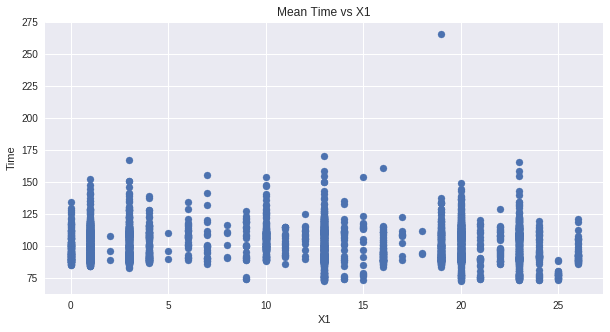

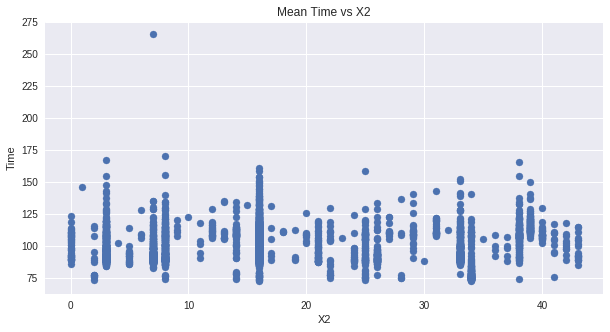

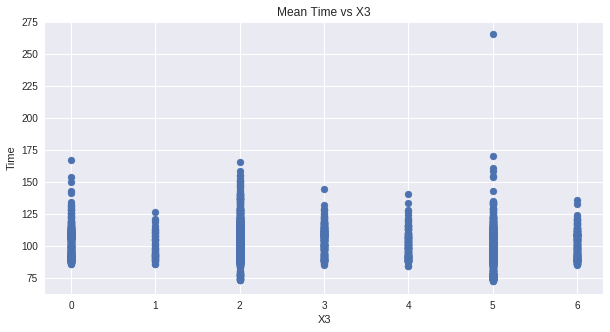

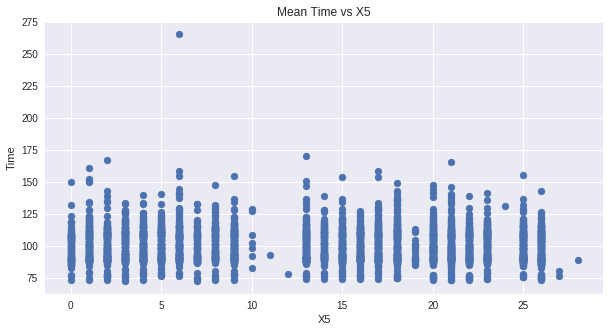

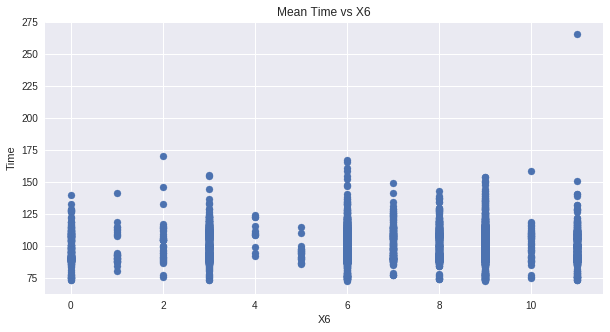

In [14]:
plt.figure(1,figsize=(10,5))
ind=np.arange(x1_df.shape[0])
plt.scatter(train_top_features_df.X1.values, train_top_features_df.y.values)
plt.xlabel("X1")
plt.ylabel("Time")
plt.title("Mean Time vs X1")

plt.figure(2,figsize=(10,5))
ind=np.arange(x1_df.shape[0])
plt.scatter(train_top_features_df.X2.values, train_top_features_df.y.values)
plt.xlabel("X2")
plt.ylabel("Time")
plt.title("Mean Time vs X2")

plt.figure(3,figsize=(10,5))
ind=np.arange(x1_df.shape[0])
plt.scatter(train_top_features_df.X3.values, train_top_features_df.y.values)
plt.xlabel("X3")
plt.ylabel("Time")
plt.title("Mean Time vs X3")


plt.figure(4,figsize=(10,5))
ind=np.arange(x1_df.shape[0])
plt.scatter(train_top_features_df.X5.values, train_top_features_df.y.values)
plt.xlabel("X5")
plt.ylabel("Time")
plt.title("Mean Time vs X5")


plt.figure(5,figsize=(10,5))
ind=np.arange(x1_df.shape[0])
plt.scatter(train_top_features_df.X6.values, train_top_features_df.y.values)
plt.xlabel("X6")
plt.ylabel("Time")
plt.title("Mean Time vs X6")
plt.show()

Let us now look at how many features have binary values and how many do not

In [15]:
binary_df=pd.DataFrame()
zeros={}
ones={}

for col in train.select_dtypes(['int64']).columns:
    num_ones=len(train[col][train[col]==1])
    num_zeros=len(train[col][train[col]==0])
    
    if num_zeros+num_ones == len(train[col]):
        zeros[col]=num_zeros
        ones[col]=num_ones        

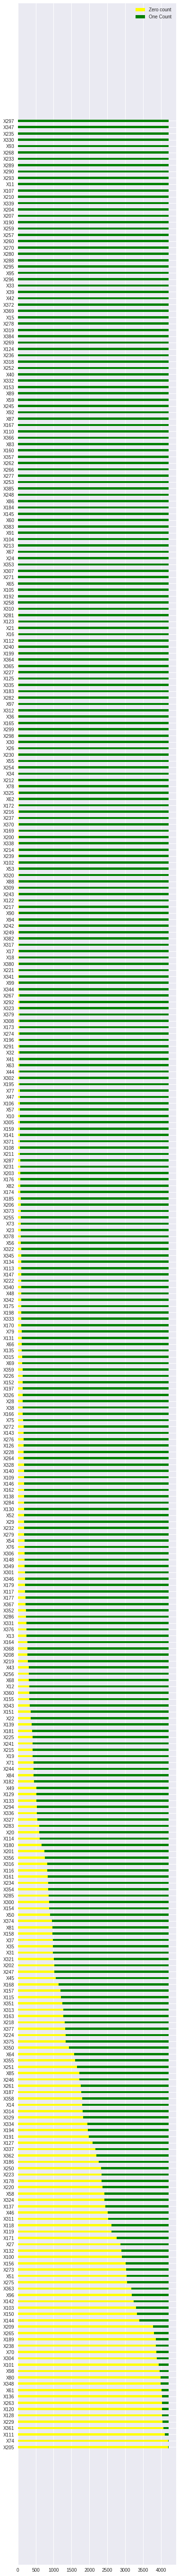

In [16]:
binary_df['columns']=zeros.keys()
binary_df['ones']=ones.values()
binary_df['zeros']=zeros.values()
binary_df=binary_df.sort_values(by='zeros')



ind=np.arange(binary_df.shape[0])

width = 0.35
plt.figure(figsize=(6,100))
p1 = plt.barh(ind, binary_df.ones.values, width, color='yellow')
p2 = plt.barh(ind, binary_df.zeros.values, width, left=binary_df.ones.values, color="green")
plt.yticks(ind, binary_df['columns'])
plt.legend((p1[0], p2[0]), ('Zero count', 'One Count'))
plt.show()

## y
Now let us look at the target variable and its distribution

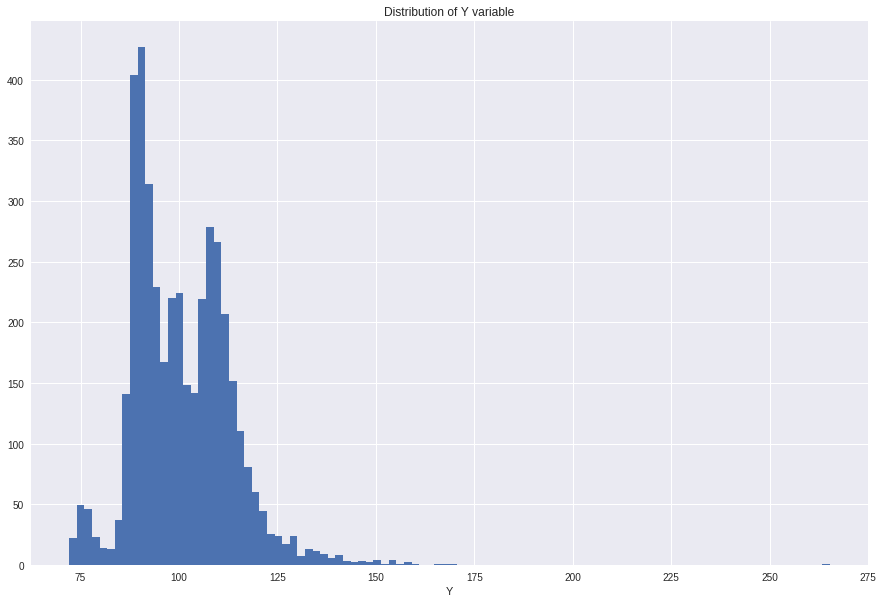

In [17]:
plt.figure(figsize=(15,10))
train['y'].hist(bins=100)
plt.xlabel('Y')
plt.title('Distribution of Y variable')
plt.show()

We take log transformation of the y variable

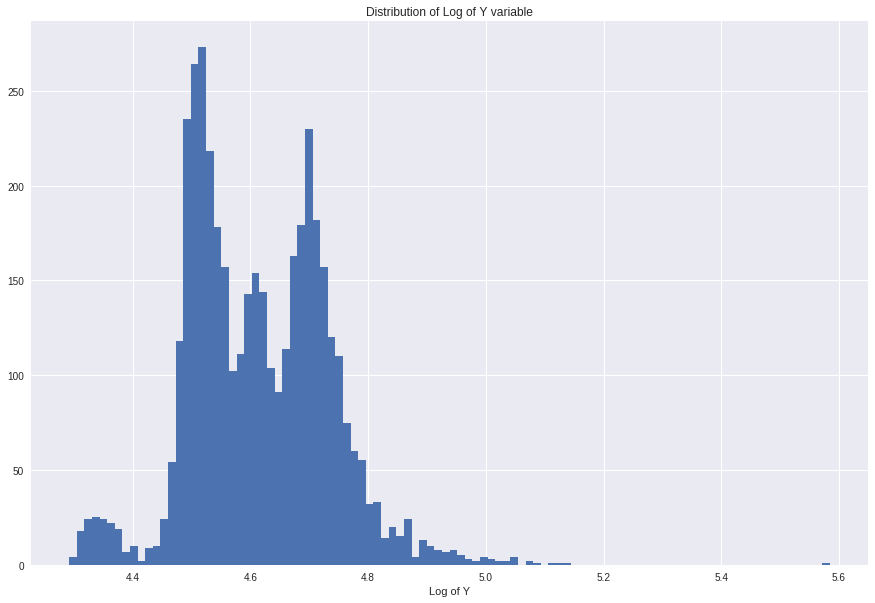

In [18]:
plt.figure(figsize=(15,10))
np.log1p(train['y']).hist(bins=100)
plt.xlabel('Log of Y')
plt.title('Distribution of Log of Y variable')
plt.show()

## ID
Let us see whether ID has any influence on the target variable and how they are related

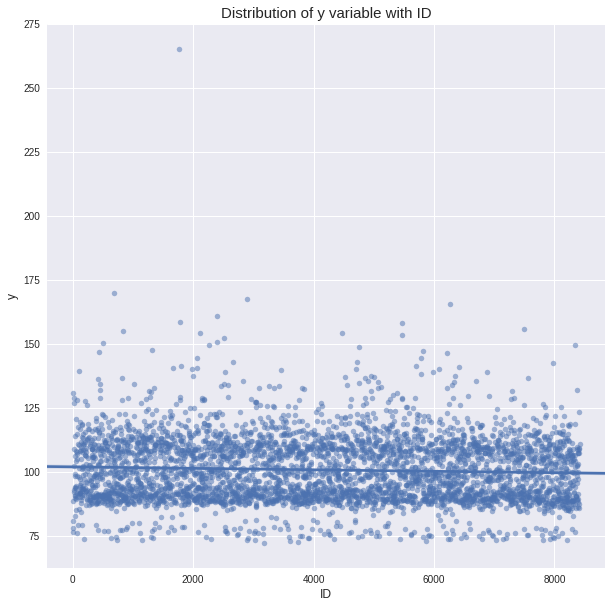

In [19]:
var_name = "ID"
plt.figure(figsize=(10,10))
sns.regplot(x=var_name, y='y', data=train, scatter_kws={'alpha':0.5, 's':30})
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with "+var_name, fontsize=15)
plt.show()

We see that mostly the values of y for different IDs is clustered around 100. But there is a slight dip in the value towards the right as the ID increases

## Number of binary values in row
We next look at the number of binary values per row and check the relation with Y variable

In [20]:
num_ones_row={}
num_zeros_row={}
y={}
for index in train.index:
    num_ones_row[index]=len(train.ix[index][train.ix[index]==1])
    num_zeros_row[index]=len(train.ix[index][train.ix[index]==0])
    y[index]=train.ix[index, 'y']

In [21]:
binary_row_df=pd.DataFrame()
binary_row_df['Indexes']=num_ones_row.keys()
binary_row_df['ones']=num_ones_row.values()
binary_row_df['zeros']=num_zeros_row.values()
binary_row_df['y']=y.values()
binary_row_df=binary_row_df.sort_values(by='ones')
binary_row_df.head(10)

,Indexes,ones,zeros,y
2724,2724,33,338,112.08
2911,2911,35,335,121.91
2811,2811,35,335,100.05
1877,1877,35,334,87.33
2494,2494,35,335,117.01
1193,1193,37,334,101.71
3908,3908,37,331,100.93
3620,3620,38,331,87.06
522,522,38,331,87.53
198,198,38,331,87.65


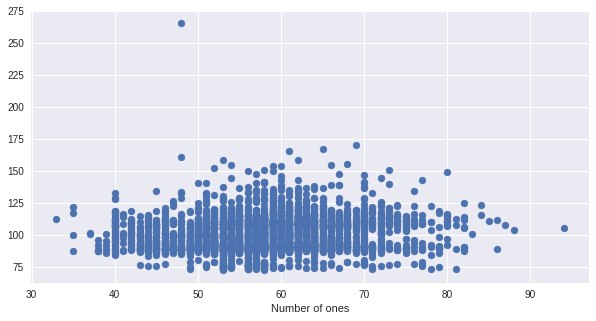

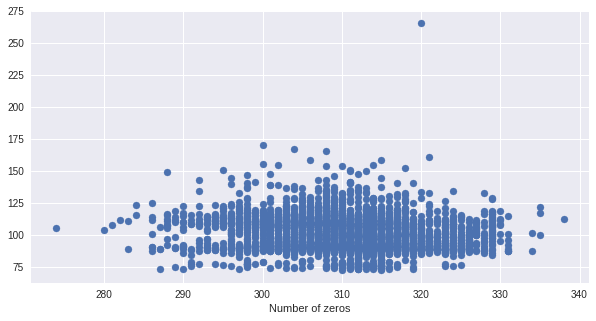

In [22]:
width = 0.35
plt.figure(figsize=(10,5))
plt.scatter(binary_row_df.ones, binary_row_df.y)
plt.xlabel('Number of ones')

plt.figure(figsize=(10,5))
plt.scatter(binary_row_df.zeros, binary_row_df.y)
plt.xlabel('Number of zeros')
plt.show()


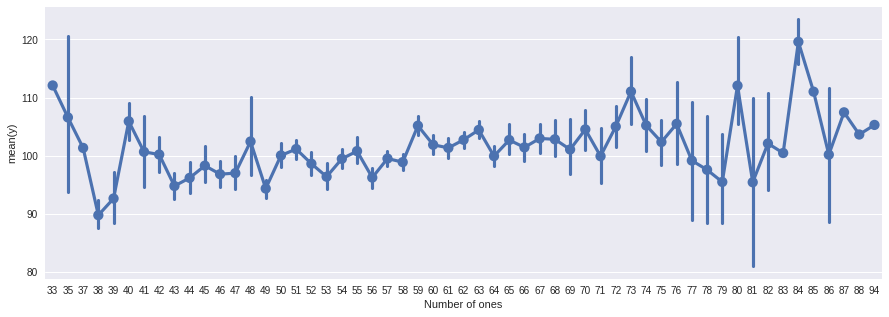

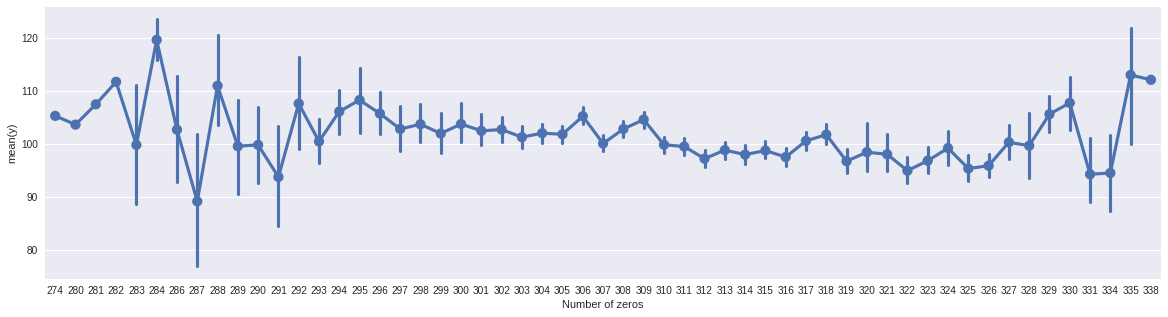

In [23]:
plt.figure(figsize=(15,5))
sns.pointplot(binary_row_df.ones, binary_row_df.y)
plt.xlabel('Number of ones')

plt.figure(figsize=(20,5))
sns.pointplot(binary_row_df.zeros, binary_row_df.y)
plt.xlabel('Number of zeros')

plt.show()

There is an increasing trend in Y with number of ones while it decreases for the number of zeros.